In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

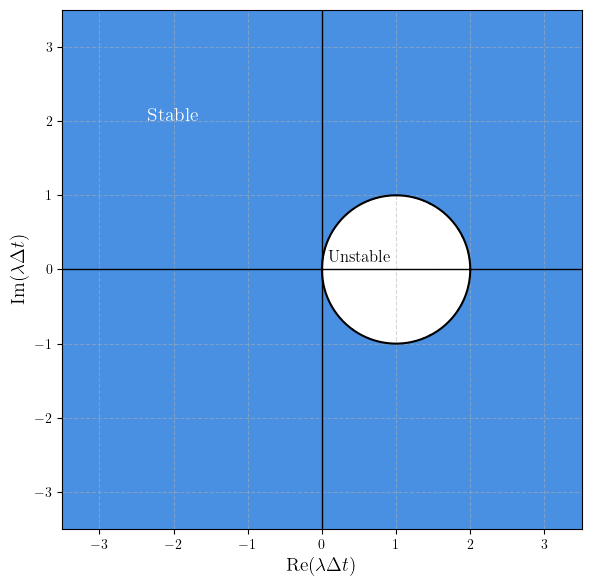

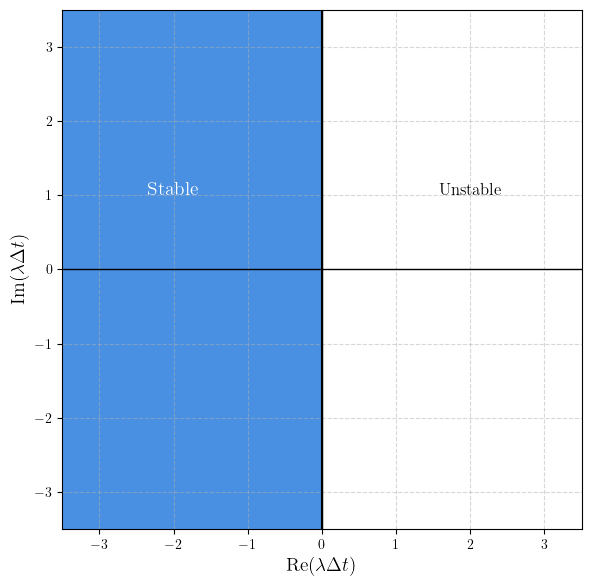

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stability_region(method_name, filename):
    x = np.linspace(-4, 4, 400)
    y = np.linspace(-4, 4, 400)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    
    plt.figure(figsize=(6, 6))
    
    if method_name == 'Implicit Euler':
        R = 1 / (1 - Z)
        mask = np.abs(R) <= 1
        
        plt.contourf(X, Y, mask, levels=[0.5, 1.5], colors=['#4A90E2'])
        
        theta = np.linspace(0, 2*np.pi, 200)
        plt.plot(1 + np.cos(theta), np.sin(theta), 'k-', linewidth=1.5)
        
        # plt.title('Implicit Euler Stability', fontsize=16, pad=15)
        plt.text(0.5, 0.1, 'Unstable', ha='center', fontsize=12, fontweight='bold')
        plt.text(-2, 2, 'Stable', ha='center', fontsize=14, fontweight='bold', color='white')

    elif method_name == 'Crank-Nicolson':
        R = (1 + Z/2) / (1 - Z/2)
        mask = np.abs(R) <= 1
        
        plt.contourf(X, Y, mask, levels=[0.5, 1.5], colors=['#4A90E2'])
        
        plt.axvline(0, color='k', linewidth=1.5)
        
        # plt.title('Crank-Nicolson Stability', fontsize=16, pad=15)
        plt.text(-2, 1, 'Stable', ha='center', fontsize=14, fontweight='bold', color='white')
        plt.text(2, 1, 'Unstable', ha='center', fontsize=12, fontweight='bold')

    plt.axhline(0, color='k', linewidth=1)
    plt.axvline(0, color='k', linewidth=1)
    plt.xlim(-3.5, 3.5)
    plt.ylim(-3.5, 3.5)
    plt.xlabel(r'Re($\lambda \Delta t$)', fontsize=14)
    plt.ylabel(r'Im($\lambda \Delta t$)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_aspect('equal')
    
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

plot_stability_region('Implicit Euler', '../../../figs/ode/implicit_euler_stability.pdf')
plot_stability_region('Crank-Nicolson', '../../../figs/ode/crank_nicolson_stability.pdf')

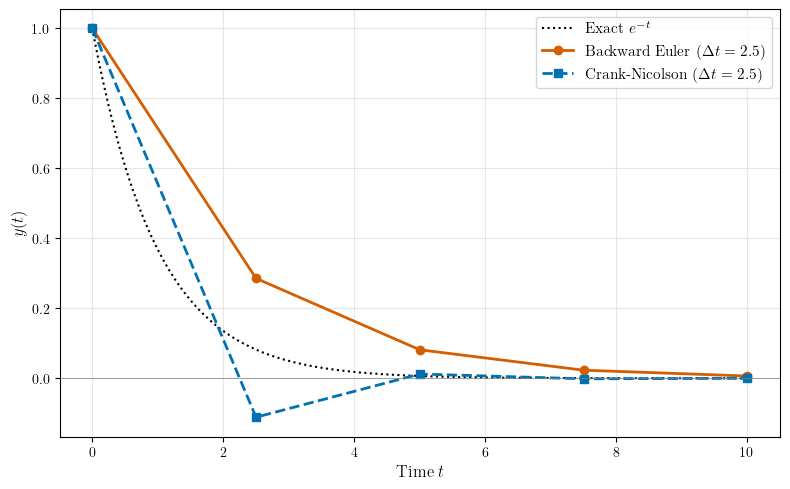

In [ ]:
def solve_ode(method, dt, T_max):
    # dy/dt = -y, y(0) = 1
    # y(t) = exp(-t)
    t_vals = np.arange(0, T_max + dt, dt)
    y_vals = np.zeros(len(t_vals))
    y_vals[0] = 1.0
    
    for i in range(len(t_vals) - 1):
        if method == 'Backward Euler':
            y_vals[i+1] = y_vals[i] / (1 + dt)
        elif method == 'Crank-Nicolson':
            y_vals[i+1] = y_vals[i] * (1 - dt/2) / (1 + dt/2)
            
    return t_vals, y_vals

T_max = 10
dt_large = 2.5

t_be, y_be = solve_ode('Backward Euler', dt_large, T_max)
t_cn, y_cn = solve_ode('Crank-Nicolson', dt_large, T_max)

t_exact = np.linspace(0, T_max, 200)
y_exact = np.exp(-t_exact)

plt.figure(figsize=(8, 5))

plt.plot(t_exact, y_exact, 'k:', linewidth=1.5, label='Exact $e^{-t}$')
plt.plot(t_be, y_be, 'o-', color='#D55E00', linewidth=2, label=f'Backward Euler ($\Delta t={dt_large}$)')
plt.plot(t_cn, y_cn, 's--', color='#0072B2', linewidth=2, label=f'Crank-Nicolson ($\Delta t={dt_large}$)')

# plt.title(r'Stability Comparison: $y'' = -y$ with Large Step $\Delta t > 2$', fontsize=14)
plt.xlabel('Time $t$', fontsize=12)
plt.ylabel('$y(t)$', fontsize=12)
plt.axhline(0, color='gray', linewidth=0.5)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../../../figs/ode/implicit_comparison_example.pdf', bbox_inches='tight', transparent=True)
plt.show()
plt.close()